In [13]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

Reading the dataset into a "data" variable

In [4]:
data = pd.read_csv("clevelanda.csv")

Top 20 rows from the dataset. 

In [5]:
data.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Know your dataset

In [9]:
data.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

1. age= age of the patients
2. gender= sex of the patients
3. cp= reported chest pain type
4. trestbps = resting blood pressure (in mm Hg on admission to the hospital)
5. chol = cholestrol in blood
6. fps = (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg= resting electrocardiographic results
8. thalach= maximum heart rate achieved
9. exang= exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. class = believing this to be our target. It defines to which class the heart diease belongs to. 

In [11]:
data.describe()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [12]:
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

# EDA Using Seaborn

Text(0.5, 1.0, 'Correlation between the Entities')

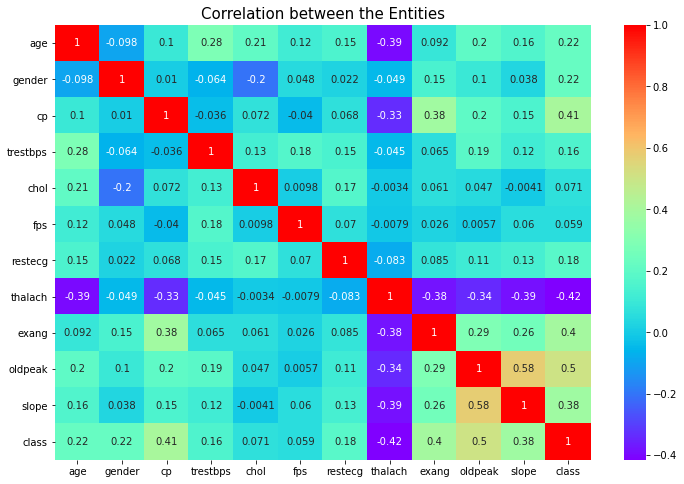

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),linecolor='white',cmap='rainbow',annot=True)
plt.title("Correlation between the Entities",fontsize=15)

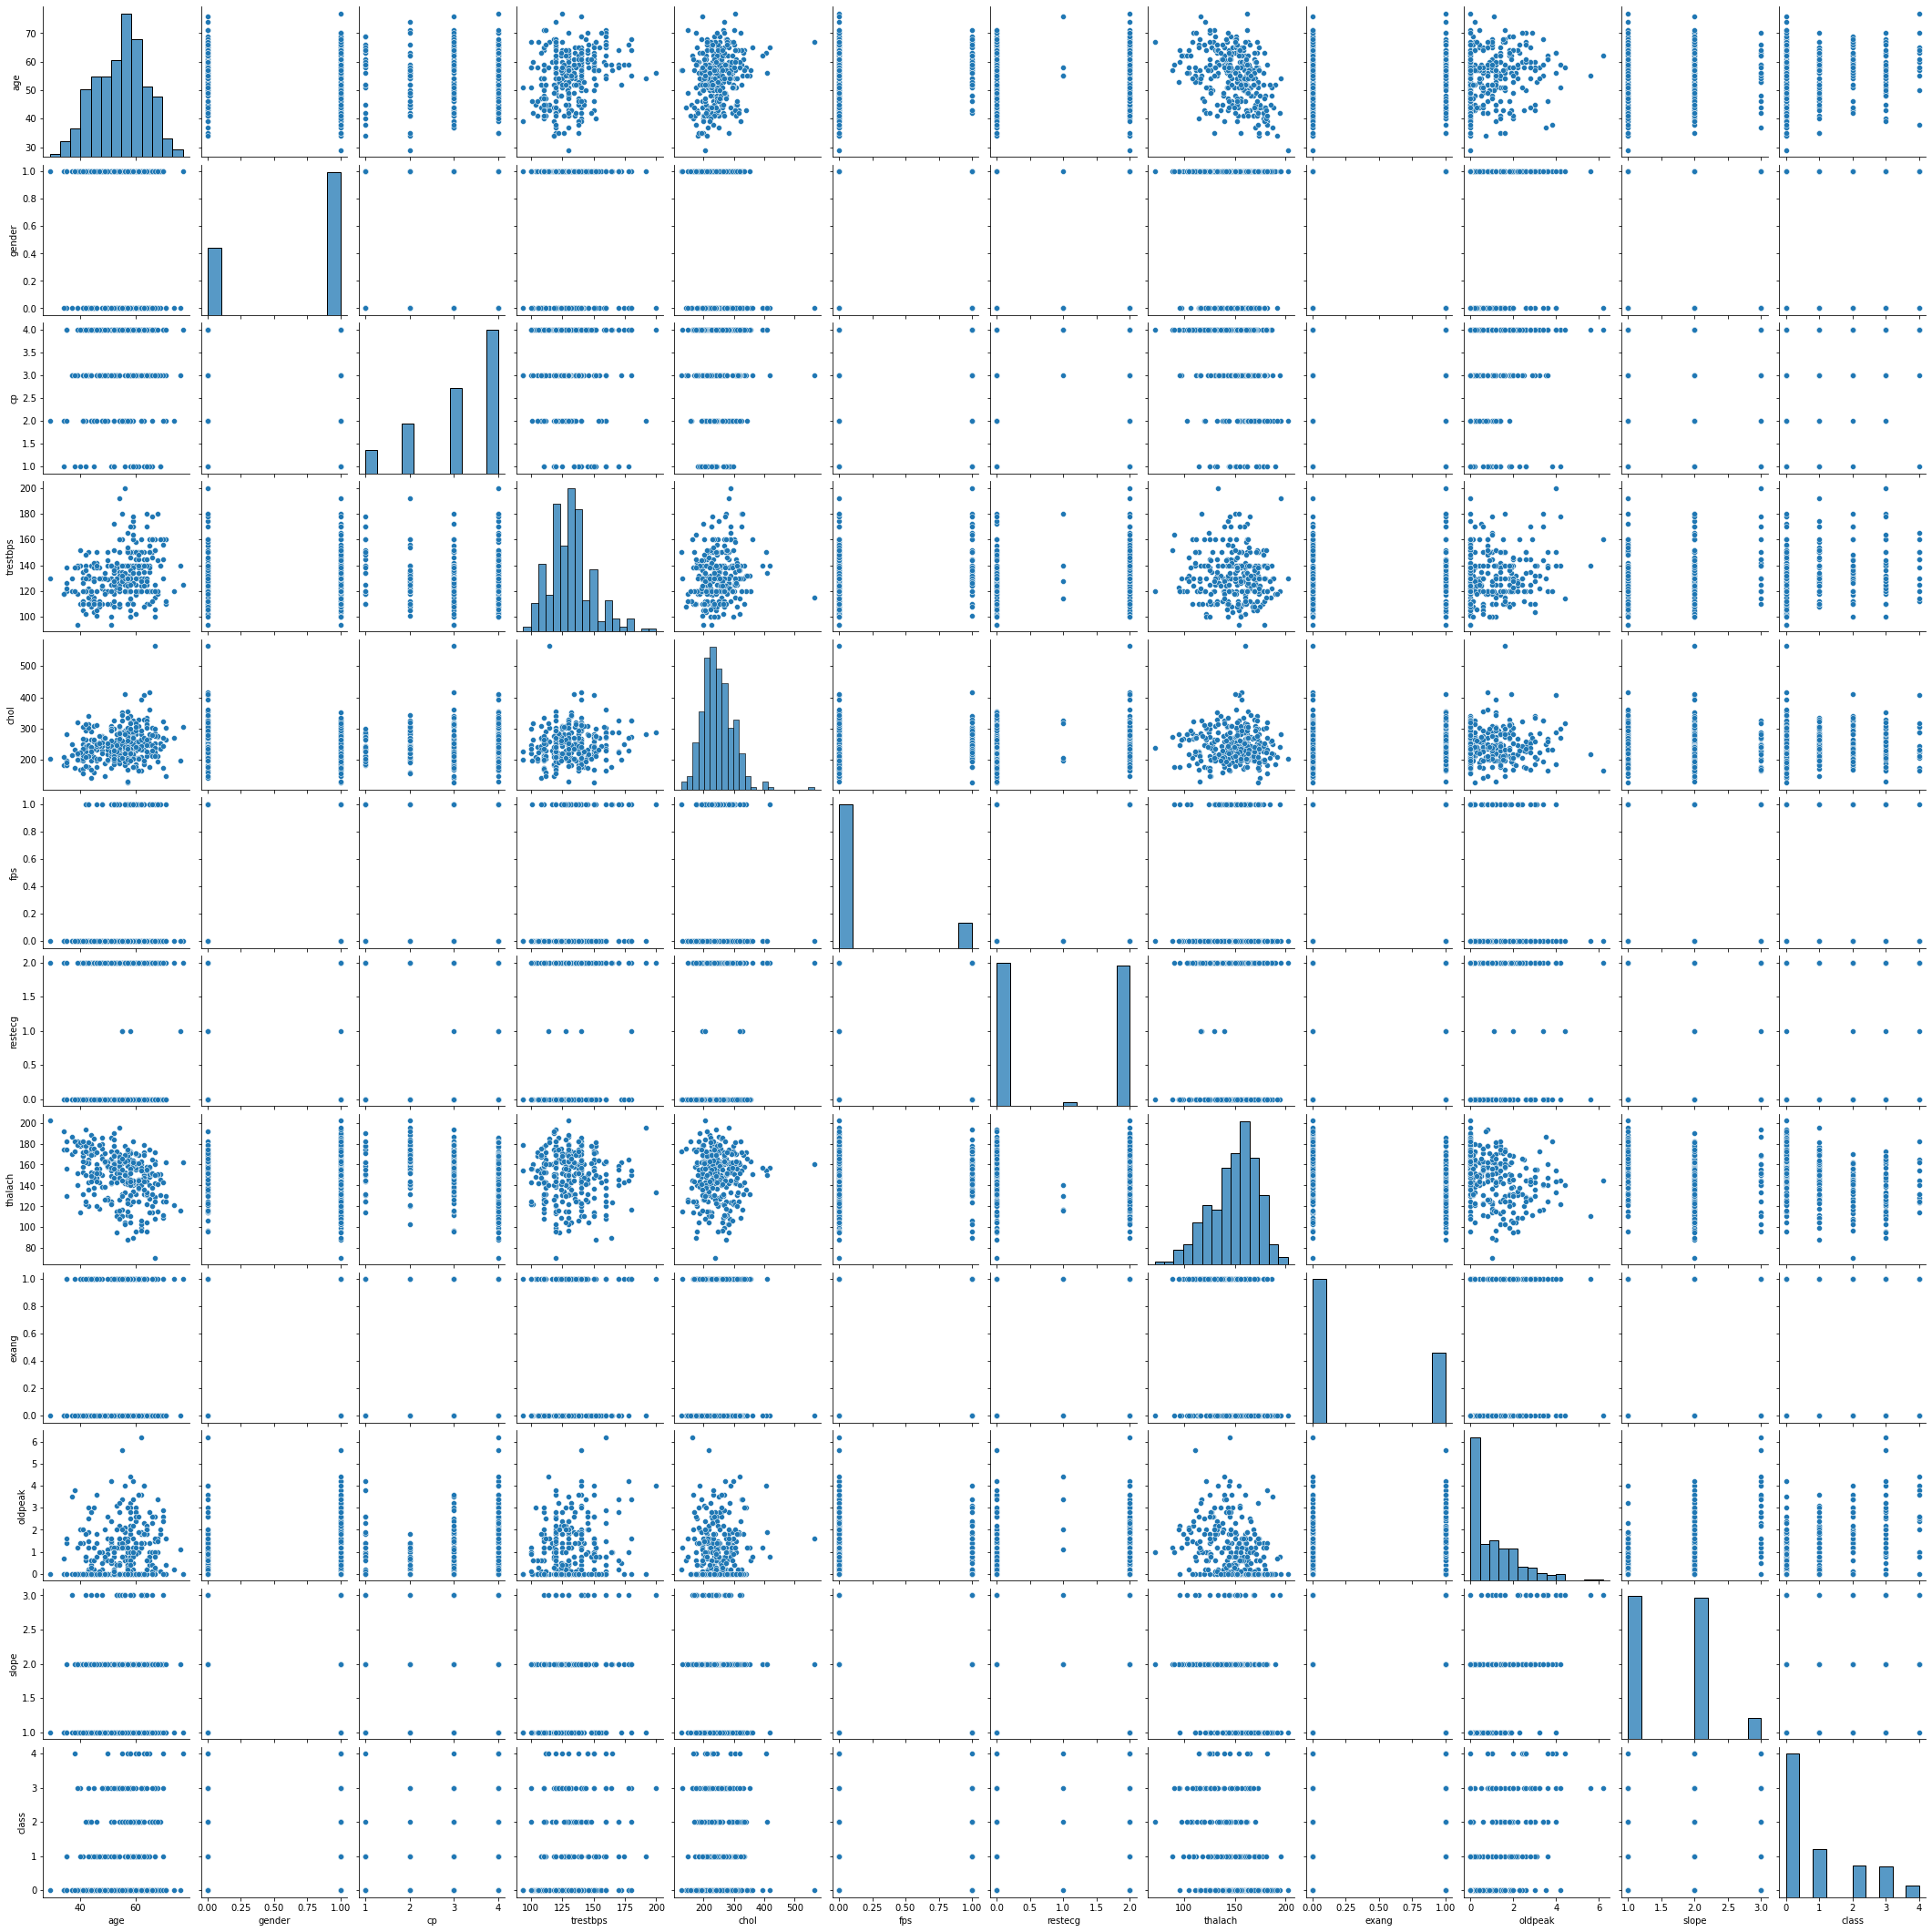

In [21]:
sns.pairplot(data)

Text(0.5, 1.0, 'Distribution of Age')

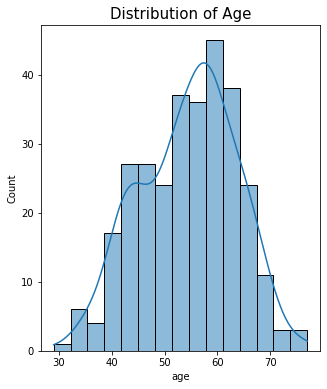

In [43]:
plt.figure(figsize=(5,6))
sns.histplot(data,x='age',bins=15,kde=True)
plt.title("Distribution of Age", fontsize=15)

1. The maximum distribution of age is between 55 to 65.
2. Most of the patients are around age- 60

Text(0.5, 1.0, 'Age vs Class')

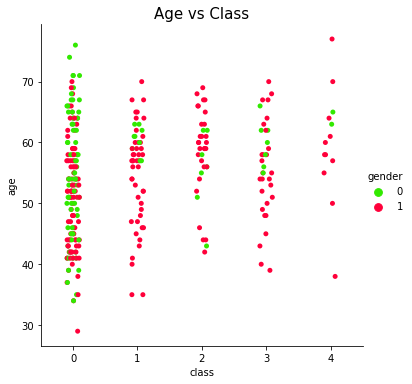

In [40]:
sns.catplot(data=data,x='class',y='age',hue='gender',palette='prism')
plt.title("Age vs Class",fontsize=15)

1. Class 0 - It has maximum number of Males(1) but the oldest patient in this category is a female (0). Also the maximum
    cases are between age 40-59(approx)
2. Class 1 - Most cases belong to gender= Male and cases are clustered in between age range 55-65.
3. Class 3 - Leading gender is Male but the cases are spread between age 40 -70. no specific clusters observered.
4. Class 4 - This is completed widepsread, Male have the most cases, although the age 55-65 sees a bit of high observation

Text(0.5, 1.0, 'Age vs Chest Pain according to the Gender')

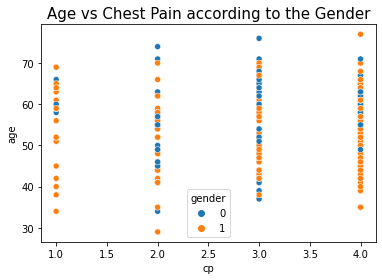

In [50]:

sns.scatterplot(data=data,x='cp',y='age',hue='gender')
plt.title("Age vs Chest Pain according to the Gender",fontsize=15)

1. Chest Pain type 3 and 4 are most observerd in the dataset, with Male being the most number of reported cases of the disease.
2. Chest Pain type 2 is most widespread, from age 30+ till 72(approx), also there is one case at the age of below 30 which can 
    also observed as an outlier.
3. Females are most frequently observed in Chest Pain type 3 and Chest Pain type 2.

Text(0.5, 1.0, 'Cholestrol vs Age')

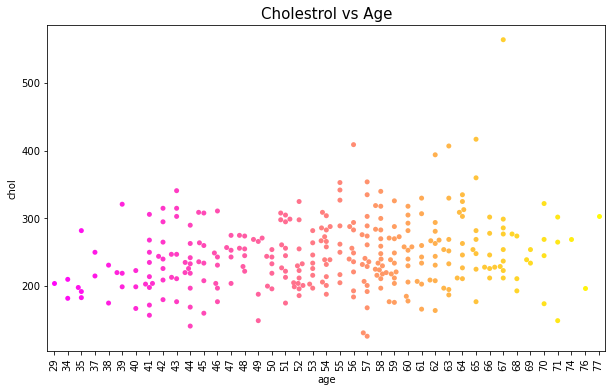

In [53]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=data,x='age',y='chol',palette='spring')
plt.xticks(rotation=90)
plt.title("Cholestrol vs Age",fontsize=15)

1. We observe 2 clusters here, first between age 29 to 49 and the other one in between age 54-63
2. Cholestrol problem is most common in Cluster 2. 
3. There is an outlier at  age 67 observing Cholestrol value above 500, almost 600 as observed from the chart.

TypeError: object of type 'bool' has no len()

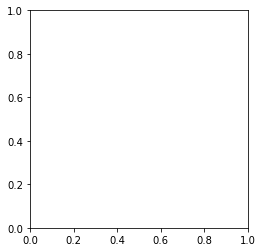

In [58]:
plt.pie(x=data['chol'],labels=data['gender'],colors='Set3',explode=True)

In [56]:
data.dtypes

age           int64
gender        int64
cp            int64
trestbps      int64
chol          int64
fps           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
class         int64
dtype: object